# [Introduction to Data Science](http://datascience-intro.github.io/1MS041-2023/)    
## 1MS041, 2023 
&copy;2023 Raazesh Sainudiin, Benny Avelin. [Attribution 4.0 International     (CC BY 4.0)](https://creativecommons.org/licenses/by/4.0/)

In [43]:
!ls data

CORIS.csv                  final.csv.zip
NYPowerBall.csv            final.tgz
co2_mm_mlo.txt             flights.csv
digits.csv                 leukemia.csv
earthquakes.csv            portland.csv
earthquakes.csv.zip        pride_and_prejudice.txt
earthquakes.tgz            rainfallInChristchurch.csv
earthquakes_small.csv      ratings.csv
final.csv                  spam.csv


# Estimation of mean

* Load data
* Make assumptions
* Estimate mean
* Write down confidence interval

In [44]:
!head -n 3 data/NYPowerBall.csv

Draw Date,Winning Numbers,Multiplier
02/09/2019,01 02 03 07 39 25,3
02/06/2019,05 13 28 38 63 21,5


In [45]:
import csv
data = []

with open('data/NYPowerBall.csv',mode='r') as f:
    csv_reader = csv.reader(f)
    header = next(csv_reader)
    
    for line in csv_reader:
        data.append(line)

In [51]:
[1,2]+[2,3]

[1, 2, 2, 3]

In [52]:
list_of_lists = [[int(str_number) for str_number in d[1].split(' ')] for d in data]
numbers = sum(list_of_lists,start=[])

In [56]:
len(numbers)

5646

In [57]:
import numpy as np
arr = np.array(list_of_lists)
numbers_arr = arr.flatten()

In [61]:
np.unique(numbers_arr)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69])

In [63]:
np.max(numbers_arr)

69

In [64]:
np.min(numbers_arr)

1

### Assumption about data

* Integers between 1 and 69
* We assume that the lotto draws are independent and identically distributed

### What to do

Compute confidence interval using Hoeffdings inequality using the bounds above

Lets say we fix a level $\alpha \in (0,1)$, and solve the equation
$$
    \alpha = 2 e^{-\frac{2n\epsilon^2}{(b-a)^2}}
$$

$$
    \ln(\alpha/2) = -\frac{2n\epsilon^2}{(b-a)^2}
$$

$$
    -(b-a)^2\ln(\alpha/2)/(2n) =\epsilon^2
$$

$$
\sqrt{(b-a)^2\ln(2/\alpha)/(2n)} = \epsilon
$$

In [65]:
def compute_epsilon(alpha,n,a,b):
    return np.sqrt((b-a)**2*np.log(2/alpha)/(2*n))

In [68]:
alpha = 0.05
n = numbers_arr.shape[0]
a = 1
b = 69
delta = compute_epsilon(alpha,n,a,b)
delta

1.2290532787806112

In [69]:
conf_interval = (np.mean(numbers_arr)-delta,np.mean(numbers_arr)+delta)
print("Confidencen interval for the mean is: ",conf_interval)

Confidencen interval for the mean is:  (28.29361763868308, 30.751724196244304)


In [71]:
import Utils

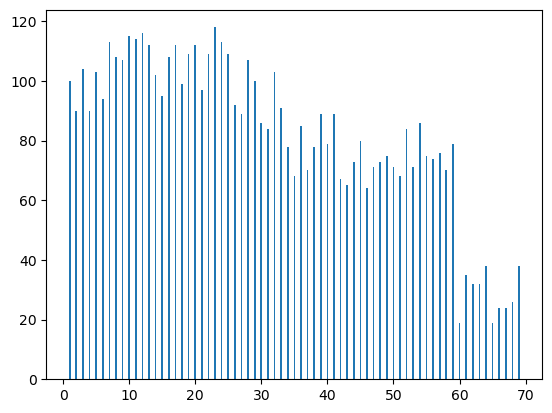

In [72]:
import matplotlib.pyplot as plt
#_=plt.hist(numbers_arr,bins=)
Utils.discrete_histogram(numbers_arr)

# Likelihood of parameter

* Load data
* Work with dates
* Make assumptions
* Write down the Risk
* Split into two parts
* Minimize the risk numerically on train
* Test the risk on test
* Make confidence intervals

In [73]:
!head -n 10 data/earthquakes.csv

publicid,eventtype,origintime,modificationtime,longitude, latitude, magnitude, depth,magnitudetype,depthtype,evaluationmethod,evaluationstatus,evaluationmode,earthmodel,usedphasecount,usedstationcount,magnitudestationcount,minimumdistance,azimuthalgap,originerror,magnitudeuncertainty
2018p368955,,2018-05-17T12:19:35.516Z,2018-05-17T12:21:54.953Z,178.4653957,-37.51944533,2.209351541,20.9375,M,,NonLinLoc,,automatic,nz3drx,12,12,6,0.1363924727,261.0977462,0.8209633086,0
2018p368878,,2018-05-17T11:38:24.646Z,2018-05-17T11:40:26.254Z,177.8775115,-37.46115663,2.155154561,58.4375,M,,NonLinLoc,,automatic,nz3drx,11,11,7,0.3083220739,232.7487132,0.842884174,0
2018p368781,,2018-05-17T10:46:46.526Z,2018-05-17T10:48:50.985Z,173.2372626,-41.23518154,2.253095604,84.6875,M,,NonLinLoc,,automatic,nz3drx,10,10,2,0.1078889041,102.8890897,0.9074578294,0
2018p368697,,2018-05-17T10:01:46.378Z,2018-05-17T13:09:25.775Z,173.6257813,-42.31633991,2.177032628,10.15625,M,,NonLinLoc,,automatic,nz3drx,18,18,5,0.11885

In [74]:
import csv
data = []

with open('data/earthquakes.csv',mode='r') as f:
    csv_reader = csv.reader(f)
    header = next(csv_reader)
    
    for line in csv_reader:
        data.append(line)

In [77]:
header[2]

'origintime'

In [78]:
data[0][2]

'2018-05-17T12:19:35.516Z'

In [82]:
import datetime
#-05-17T12:19:35.516Z
datetime.datetime.strptime(data[0][2],"%Y-%m-%dT%H:%M:%S.%fZ")

datetime.datetime(2018, 5, 17, 12, 19, 35, 516000)

In [83]:
origin_time = [datetime.datetime.strptime(d[2],"%Y-%m-%dT%H:%M:%S.%fZ") for d in data]

In [89]:
or_time_arr = np.array(origin_time)
sort_time_arr = np.sort(or_time_arr)
time_between_eq=np.diff(sort_time_arr)

In [99]:
time_between_eq_arr = np.array([d.total_seconds() for d in time_between_eq])

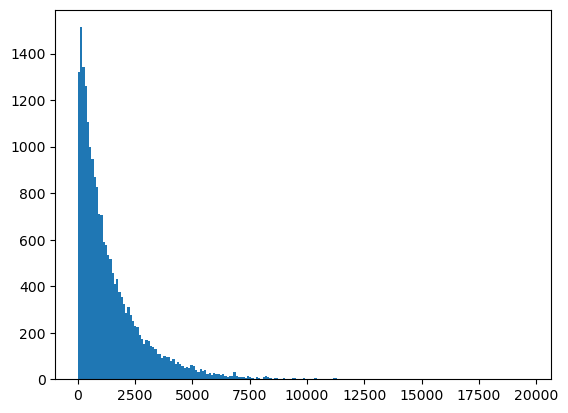

In [101]:
_=plt.hist(time_between_eq_arr,bins=200)

### Assumptions on data

* Exponentially distributed
* Lets also assume that they are IID

The density is given by?
$$
    f(x) = \lambda^\ast e^{-\lambda^\ast x}
$$

$$
    L(f_\lambda,x) = -\ln(f_\lambda(x))
$$

$$
    E[L(f_\lambda,x)] = E[-\ln(f_\lambda(x))]
$$

$$
    \hat R(\lambda) = \frac{1}{n} \sum_{i=1}^n (- \ln(f_\lambda(X_i))
$$

$$
    -\ln(f_\lambda(x)) = -\ln(\lambda) + \lambda x
$$

In [102]:
np.random.shuffle(time_between_eq_arr)
total_n = len(time_between_eq_arr)
train_n = int(total_n*0.5)
test_n = total_n-train_n

train_data, test_data = (time_between_eq_arr[:train_n],time_between_eq_arr[train_n:])

In [103]:
train_data

array([3370.053,  346.423, 1003.69 , ...,  718.077,  280.379, 8105.033])

In [104]:
test_data

array([3549.283,  320.408, 1532.265, ..., 4354.282,  173.061, 1868.695])

In [107]:
# define the objective/cost/loss function we want to minimise
def empirical_risk_train(l):
    return np.mean(-np.log(l)+l*train_data)

In [113]:
empirical_risk_train(0.001)

8.361204408610003

In [123]:
result = optimize.minimize(empirical_risk_train,0.0001,method='Nelder-Mead')
l_hat = result['x'][0]
l_hat

0.0006850000000000011

In [124]:
1/l_hat

1459.8540145985378

Lets consider the loss
$$
    L(c,x) = |c-x|
$$
The risk then becomes
$$
    R(c) = E[L(c,x)] = E[|c-x|]
$$

So, for our problem, since we have estimated $\hat \lambda$ we can test it as a method of prediction by estimating the following quantity
$$
    E[|1/\hat \lambda - X| \mid \hat \lambda]
$$

We could use our testing data to estimate the above, i.e.
$$
    \frac{1}{n_{test}} \sum_{X_i \in \text{ testing data}} |1/\hat \lambda - X_i|
$$

In [129]:
np.mean(np.abs(1/l_hat - test_data))

1103.4427493567632

In [131]:
np.mean(np.abs(test_data-np.mean(test_data)))

1094.115296106876

# Logistic Regression

* Load the data
* Separate the data into two parts
* Scale the training data (standard scaling)
* Convert labels to -1 1 for better numerics
* Solve the minimal risk problem
* Tranform the test data with the scaling of the train data
* Test the model
* Confidence interval around prediction

In [ ]:
!head -n 10 data/CORIS.csv

In [ ]:
# Load data
# Standard scale
# Convert labels to -1,1
# Solve the likelihood problem

In [ ]:
import numpy as np
from scipy import optimize

# define the objective/cost/loss function we want to minimise
def f(x):
    return np.sum(np.log(1+np.exp(-Y1*(x[0] + x[1]*X_sc[:,9]))))

# multi-dimensional optimisation is syntactically similar to 1D, 
# but we are using Gradient and Hessian information from numerical evaluation of f to 
# iteratively improve the solution along the steepest direction, etc. 
# It 'LBFGS' method you will see in scientific computing
parameter_bounding_box=((-10, 2), (-10, 2)) # specify the constraints for each parameter
initial_arguments = np.array([0, 0]) # point in 2D to initialise the minimize algorithm
result = optimize.minimize(f, initial_arguments, bounds=parameter_bounding_box,) # just call the minimize method!
result